In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages
import re

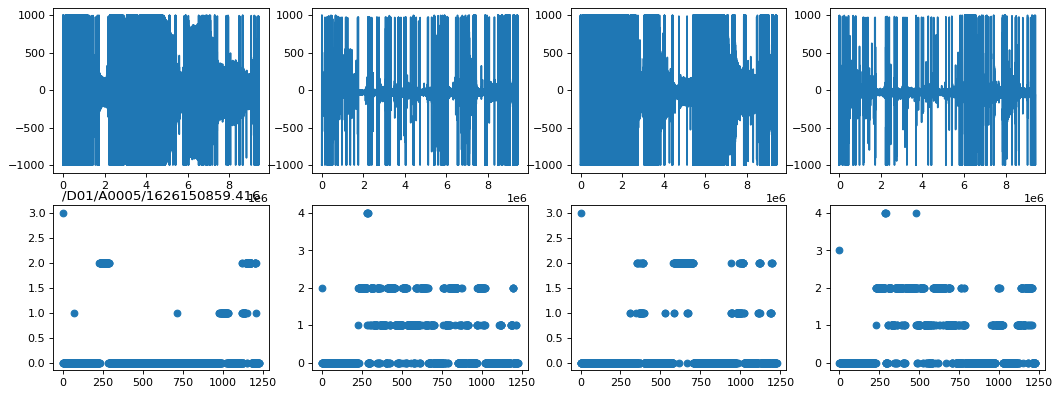

In [8]:
def _load(fi, fn):
    return np.load(fi)['eeg_array'], np.load(fn)['stages']

def _plot(xx, ss, name):
    plt.figure(figsize=(16, 6), dpi=80)
    for kk in range(4):
        plt.subplot(2,4,kk+1)
        if kk==0: plt.title(name)
        plt.plot(xx[:,kk])
    for kk in range(4):
        plt.subplot(2,4,kk+5)
        plt.scatter(np.arange(ss.shape[1]), ss[kk])

with PdfPages('report.pdf') as pdf:
    # fll = [str(ss) for ss in Path('session_export/').rglob('ds_stages*.npz')]
    fll = [str(ss) for ss in Path('session_export/').rglob('eeg_*.npz')]
    # fno = re.sub('eeg_', 'ds_stages_',fn)

    for fi in fll:
        fn = re.sub('eeg_', 'ds_stages_',fi)
        name = re.sub('session_export','',fn)
        name = re.sub('/ds.*','',name)
        _plot(*_load(fi, fn), name)
        # pdf.savefig()
        # plt.close()
        break